In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# 1 - Lendo o Arquivo
df = pd.read_excel(r'C:\Users\home\Documents\AIRFLOW\case_consultas_2.xlsx', sheet_name='Export')

In [17]:
print(df)

        id_consulta  id_profissional  id_paciente       data_consulta  \
0           2532996             7683       795180 2022-05-01 08:00:00   
1           2628732             4249       811349 2022-05-01 08:00:00   
2           2631407            37365     10327048 2022-05-01 08:00:00   
3           2532987             7683       781476 2022-05-01 08:40:00   
4           2640713            20997     10273861 2022-05-01 08:45:00   
...             ...              ...          ...                 ...   
143603      2803075            13406      1166230 2022-05-31 23:00:00   
143604      2854195            32965     10108981 2022-05-31 23:00:00   
143605      2861163            11134     10212220 2022-05-31 23:00:00   
143606      2872091            37029      1126584 2022-05-31 23:00:00   
143607      2873415            22903     10367022 2022-05-31 23:00:00   

       status_consulta       convenio  
0            Realizada   Operadora_83  
1            Realizada    Particular_  
2  

In [18]:
# 2 - Criando uma nova coluna "convenio_2"
df['convenio_2'] = df['convenio'].str.split('_').str[0]

In [19]:
# 3 - Transformando a coluna data_consulta em Datetime e criando hora_consulta

df['data_consulta'] = pd.to_datetime(df['data_consulta'])

df['hora_consulta'] = df['data_consulta'].dt.strftime('%H:%M:%S')

In [21]:
print(df)

        id_consulta  id_profissional  id_paciente       data_consulta  \
0           2532996             7683       795180 2022-05-01 08:00:00   
1           2628732             4249       811349 2022-05-01 08:00:00   
2           2631407            37365     10327048 2022-05-01 08:00:00   
3           2532987             7683       781476 2022-05-01 08:40:00   
4           2640713            20997     10273861 2022-05-01 08:45:00   
...             ...              ...          ...                 ...   
143603      2803075            13406      1166230 2022-05-31 23:00:00   
143604      2854195            32965     10108981 2022-05-31 23:00:00   
143605      2861163            11134     10212220 2022-05-31 23:00:00   
143606      2872091            37029      1126584 2022-05-31 23:00:00   
143607      2873415            22903     10367022 2022-05-31 23:00:00   

       status_consulta       convenio  convenio_2 hora_consulta  
0            Realizada   Operadora_83   Operadora      08

In [23]:
# 4 - Mostrar a quantidade de cada tipo de 'convenio_2'
quantidade_por_convenio = df['convenio_2'].value_counts()
print(quantidade_por_convenio)

Operadora     88981
Empresa       26330
Associação    22336
Particular     5961
Name: convenio_2, dtype: int64


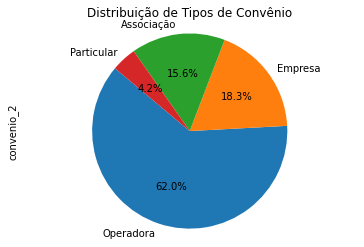

In [24]:
# 5 - Criando um visual para verificar a quantidade de "Convenio_2"

quantidade_por_convenio = df['convenio_2'].value_counts()
quantidade_por_convenio.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Tipos de Convênio')
plt.axis('equal')  # Faz com que o gráfico seja uma circunferência perfeita
plt.show()

In [29]:
# 6 - Separo por periodo do dia
bins = [0, 12, 18, 24]
labels = ['Primeira faixa do dia', 'Segunda Faixa do dia', 'Terceira faixa do dia']
df['faixa_do_dia'] = pd.cut(df['data_consulta'].dt.hour, bins=bins, labels=labels, right=False)
tabela_frequencia = pd.crosstab(df['faixa_do_dia'], df['convenio_2'])
print(tabela_frequencia)

convenio_2             Associação  Empresa  Operadora  Particular
faixa_do_dia                                                     
Primeira faixa do dia       10732     5955      19518        1314
Segunda Faixa do dia         9964     9206      32848        2183
Terceira faixa do dia        1640    11169      36615        2464


In [32]:
# 7 - Adiciono a visão total
tabela_frequencia = pd.crosstab(df['faixa_do_dia'], df['convenio_2'])
tabela_frequencia['Total'] = tabela_frequencia.sum(axis=1)
print(tabela_frequencia)

convenio_2             Associação  Empresa  Operadora  Particular  Total
faixa_do_dia                                                            
Primeira faixa do dia       10732     5955      19518        1314  37519
Segunda Faixa do dia         9964     9206      32848        2183  54201
Terceira faixa do dia        1640    11169      36615        2464  51888


In [35]:
# 8 - Adiciono a visão %


tabela_frequencia = pd.crosstab(df['faixa_do_dia'], df['convenio_2'])
tabela_frequencia['Total'] = tabela_frequencia.sum(axis=1)
for coluna in tabela_frequencia.columns:
    tabela_frequencia[f'% {coluna}'] = (tabela_frequencia[coluna] / tabela_frequencia['Total']) * 100

print(tabela_frequencia)

convenio_2             Associação  Empresa  Operadora  Particular  Total  \
faixa_do_dia                                                               
Primeira faixa do dia       10732     5955      19518        1314  37519   
Segunda Faixa do dia         9964     9206      32848        2183  54201   
Terceira faixa do dia        1640    11169      36615        2464  51888   

convenio_2             % Associação  % Empresa  % Operadora  % Particular  \
faixa_do_dia                                                                
Primeira faixa do dia     28.604174  15.871958    52.021642      3.502226   
Segunda Faixa do dia      18.383425  16.984926    60.604048      4.027601   
Terceira faixa do dia      3.160654  21.525208    70.565449      4.748689   

convenio_2             % Total  
faixa_do_dia                    
Primeira faixa do dia    100.0  
Segunda Faixa do dia     100.0  
Terceira faixa do dia    100.0  


Insights Obtidos

1 - Distribuição dos Tipos de Convênio:
Observamos que a maioria das consultas foram realizadas por clientes com convênios de Operadora, seguido por Empresa, Associação e, por último, Particular. Isso indica que uma parte significativa dos pacientes utiliza serviços de saúde por meio de convênios empresariais ou planos de saúde.

2 - Variação ao Longo do Dia:
Ao analisar a distribuição das consultas ao longo do dia, percebemos que o número de consultas tende a aumentar nas faixas de horário posteriores, com a maior proporção de consultas ocorrendo na segunda faixa do dia. Isso indica uma demanda crescente por serviços de saúde durante a tarde e a noite.

3 - Comportamento por Tipo de Convênio:
Examinando a distribuição das consultas por tipo de convênio em cada faixa do dia, podemos notar que:

- O perfil de consulta dos convênios de Operadora é consistente ao longo do dia, representando a maioria das consultas em todas as faixas horárias.
- As consultas com convênios de Empresa são mais frequentes nas faixas de horário intermediárias.
- Os convênios de Associação têm uma presença mais uniforme ao longo do dia, com uma leve queda no número de consultas durante a segunda faixa do dia.
- As consultas particulares têm uma participação relativamente baixa, representando uma pequena proporção do total em todas as faixas horárias.

4 - Porcentagem do Total:
As porcentagens em relação ao total para cada tipo de convênio e faixa do dia fornecem uma visão mais detalhada da participação de cada segmento no volume total de consultas em diferentes momentos do dia.

Esses insights são úteis para o planejamento estratégico e operacional de clínicas e hospitais, permitindo uma melhor alocação de recursos e o desenvolvimento de estratégias de atendimento mais eficazes para atender às necessidades dos pacientes em diferentes momentos do dia.
Exemplos:
- Aumento de Funcionários nas clínicas e hospitais na segunda faixa do dia.
- Implementação de um sistema de agendamento inteligente que utilize os dados históricos de cada paciente.